<a href="https://colab.research.google.com/github/DionKimmm/2019SummerML/blob/master/Day11_1_mnist_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow as tf
import random
import matplotlib.pyplot as plt
tf.set_random_seed(777)  # for reproducibility

In [2]:
from tensorflow.examples.tutorials.mnist import input_data
# Check out https://www.tensorflow.org/get_started/mnist/beginners for
# more information about the mnist dataset
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

W0712 11:38:03.367190 140217580140416 deprecation.py:323] From <ipython-input-2-b567b2897435>:4: read_data_sets (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
W0712 11:38:03.369211 140217580140416 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/contrib/learn/python/learn/datasets/mnist.py:260: maybe_download (from tensorflow.contrib.learn.python.learn.datasets.base) is deprecated and will be removed in a future version.
Instructions for updating:
Please write your own downloading logic.
W0712 11:38:03.370932 140217580140416 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/contrib/learn/python/learn/datasets/base.py:252: _internal_retry.<locals>.wrap.<locals>.wrapped_fn (from tensorflow.contrib.learn.python.learn.datasets.base) is deprecated and will be removed

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting MNIST_data/train-images-idx3-ubyte.gz


W0712 11:38:03.778053 140217580140416 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/contrib/learn/python/learn/datasets/mnist.py:267: extract_labels (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instructions for updating:
Please use tf.data to implement this functionality.
W0712 11:38:03.783670 140217580140416 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/contrib/learn/python/learn/datasets/mnist.py:110: dense_to_one_hot (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instructions for updating:
Please use tf.one_hot on tensors.
W0712 11:38:03.882769 140217580140416 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/contrib/learn/python/learn/datasets/mnist.py:290: DataSet.__init__ (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be remove

Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [0]:
nb_classes = 10

# MNIST data image of shape 28 * 28 = 784
X = tf.placeholder(tf.float32, [None, 784])
# 0 - 9 digits recognition = 10 classes
Y = tf.placeholder(tf.float32, [None, nb_classes])

In [0]:
W = tf.Variable(tf.random_normal([784, nb_classes]))
b = tf.Variable(tf.random_normal([nb_classes]))

In [0]:
# Hypothesis (using softmax)
hypothesis = tf.nn.softmax(tf.matmul(X, W) + b)

cost = tf.reduce_mean(-tf.reduce_sum(Y * tf.log(hypothesis), axis=1))
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(cost)

In [6]:
# Test model
is_correct = tf.equal(tf.arg_max(hypothesis, 1), tf.arg_max(Y, 1))
# Calculate accuracy
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))

W0712 11:38:33.127040 140217580140416 deprecation.py:323] From <ipython-input-6-cbda19e45a31>:1: arg_max (from tensorflow.python.ops.gen_math_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use `tf.math.argmax` instead


In [0]:
# parameters
training_epochs = 15
batch_size = 100

In [0]:
sess = tf.Session()
# Initialize TensorFlow variables
sess.run(tf.global_variables_initializer())

In [9]:
for epoch in range(training_epochs):
    avg_cost = 0
    total_batch = int(mnist.train.num_examples / batch_size)

    for i in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        c, _ = sess.run([cost, optimizer], feed_dict={
                        X: batch_xs, Y: batch_ys})
        avg_cost += c / total_batch

    print('Epoch:', '%04d' % (epoch + 1),
          'cost =', '{:.9f}'.format(avg_cost))


Epoch: 0001 cost = 2.826302671
Epoch: 0002 cost = 1.061668953
Epoch: 0003 cost = 0.838061300
Epoch: 0004 cost = 0.733232729
Epoch: 0005 cost = 0.669279874
Epoch: 0006 cost = 0.624611825
Epoch: 0007 cost = 0.591160346
Epoch: 0008 cost = 0.563868980
Epoch: 0009 cost = 0.541745169
Epoch: 0010 cost = 0.522673575
Epoch: 0011 cost = 0.506782328
Epoch: 0012 cost = 0.492447637
Epoch: 0013 cost = 0.479955836
Epoch: 0014 cost = 0.468893668
Epoch: 0015 cost = 0.458703486


In [10]:
print("Learning finished")

# Test the model using test sets
print("Accuracy: ", accuracy.eval(session=sess, feed_dict={
      X: mnist.test.images, Y: mnist.test.labels}))

Learning finished
Accuracy:  0.8951


Label:  [1]
Prediction:  [1]


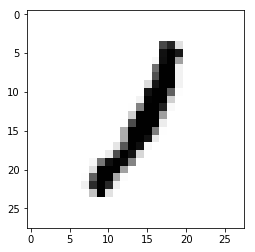

In [11]:
# Get one and predict
r = random.randint(0, mnist.test.num_examples - 1)
print("Label: ", sess.run(tf.argmax(mnist.test.labels[r:r + 1], 1)))
print("Prediction: ", sess.run(
    tf.argmax(hypothesis, 1), feed_dict={X: mnist.test.images[r:r + 1]}))

plt.imshow(
    mnist.test.images[r:r + 1].reshape(28, 28),
    cmap='Greys',
    interpolation='nearest')
plt.show()